In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [2]:
disease_df = pd.read_csv("framingham.csv")
disease_df.drop(columns=['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [19]:
# remove nan / nan values
disease_df.dropna(axis = 0, inplace = True)
disease_df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [18]:
disease_df.TenYearCHD.value_counts()

TenYearCHD
0    3179
1     572
Name: count, dtype: int64

In [15]:
disease_df.describe()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [16]:
disease_df.corr()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Sex_male,1.000000,-0.024142,0.203215,0.325886,-0.052355,-0.002513,0.003588,0.011834,-0.067595,-0.044515,0.053890,0.074868,-0.115444,0.003130,0.096000
age,-0.024142,1.000000,-0.211338,-0.188804,0.131690,0.050018,0.305292,0.109321,0.261443,0.388280,0.205191,0.136428,-0.005893,0.118529,0.231584
currentSmoker,0.203215,-0.211338,1.000000,0.773259,-0.051816,-0.037573,-0.105258,-0.045308,-0.049945,-0.133154,-0.114118,-0.165404,0.054924,-0.054078,0.021709
cigsPerDay,0.325886,-0.188804,0.773259,1.000000,-0.046625,-0.035713,-0.067470,-0.039436,-0.030600,-0.092310,-0.056202,-0.090525,0.067194,-0.055090,0.055920
BPMeds,-0.052355,0.131690,-0.051816,-0.046625,1.000000,0.111601,0.262955,0.056337,0.089625,0.269479,0.199282,0.105128,0.010228,0.052464,0.084740
prevalentStroke,-0.002513,0.050018,-0.037573,-0.035713,0.111601,1.000000,0.065169,0.009423,0.012297,0.060421,0.055189,0.035568,-0.016673,0.015789,0.047684
prevalentHyp,0.003588,0.305292,-0.105258,-0.067470,0.262955,0.065169,1.000000,0.082030,0.164645,0.697849,0.616753,0.303411,0.142013,0.085776,0.178615
diabetes,0.011834,0.109321,-0.045308,-0.039436,0.056337,0.009423,0.082030,1.000000,0.047453,0.104393,0.051761,0.093098,0.063370,0.616087,0.093222
totChol,-0.067595,0.261443,-0.049945,-0.030600,0.089625,0.012297,0.164645,0.047453,1.000000,0.216375,0.169811,0.119651,0.094795,0.046902,0.089613
sysBP,-0.044515,0.388280,-0.133154,-0.092310,0.269479,0.060421,0.697849,0.104393,0.216375,1.000000,0.785853,0.330484,0.181381,0.132878,0.220108


# Splitting the Dataset into Test and Train Sets

In [21]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])
X = preprocessing.StandardScaler().fit(X).transform(X)


# test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


# EDA

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_18456\3450285668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,


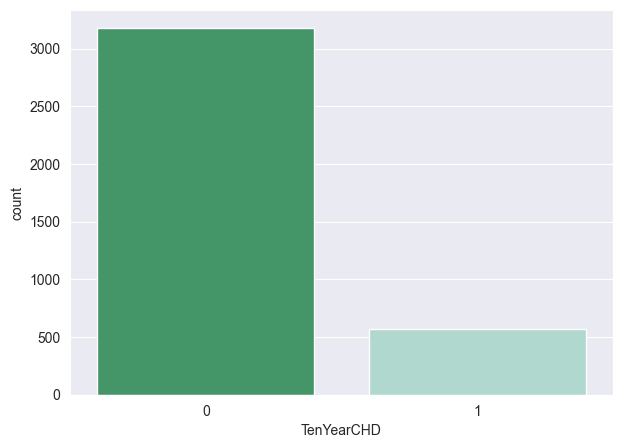

In [6]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")
plt.show()

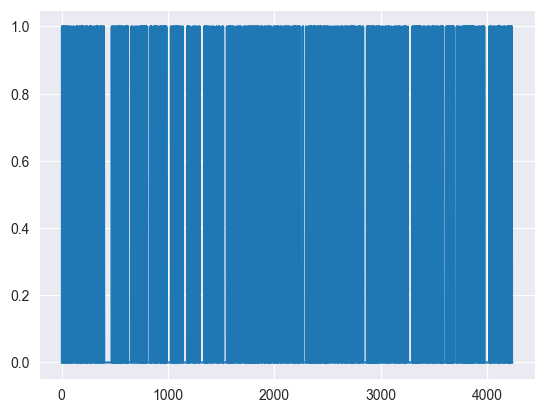

In [7]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

# Logistic Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [13]:
#  Evaluating Logistic Regression Model
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8490230905861457


The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



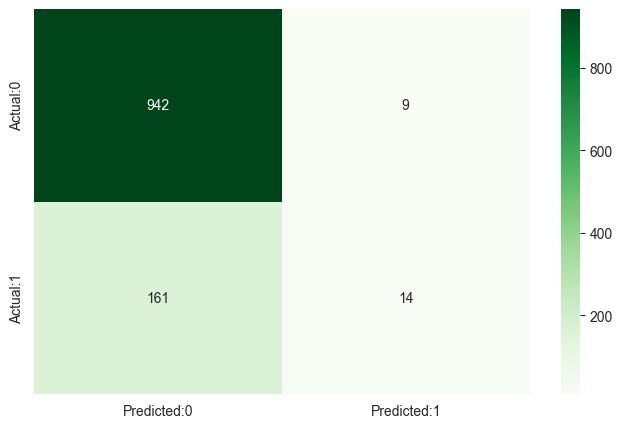

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
# Confusion Matrix is a performance evaluation tool used to assess the accuracy of a classification model.
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()